## Hausarbeit 5.1
Experimentieren Sie mit der Anzahl der versteckten Neuronen und der 
Lernrate. Welche Änderungen erzeugen ein lineares Ausgangsverhalten
und welche Änderungen führen zu starkem “Overfitting”?


<span style="color:red">**Anmerkung: Die Beantwortung der Fragen finden Sie im Verlauf des Notebooks**</span>

In [236]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import torch.nn as nn
from collections import OrderedDict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [237]:
# Definition des Datensatzes
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

In [238]:
# Bildung der zufälligen Indizes
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [239]:
# Aufteilen der Daten in zufällige Validierungs- und Trainingsdatensätze
# Trainingsdatensatz
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

# Validierungsdatensatz
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

# Normieren der Daten
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [240]:
# Definition des Trainingloops
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [241]:
## Experimentieren mit der Anzahl der versteckten Neuronen Neuronen: 

########## Neuronen = 1 ############
# Definition des KNN-Modells
hidden_layers = 1
seq_model1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model1,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Neuronen = 13 ############
hidden_layers = 13
seq_model13 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model13.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model13,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Neuronen = 2000 ############
hidden_layers = 1500
seq_model1500 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model1500.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model1500,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)


Epoch 1, Training loss 169.0754, Validation loss 97.3761
Epoch 1000, Training loss 20.7991, Validation loss 1.4924
Epoch 2000, Training loss 11.3958, Validation loss 11.1001
Epoch 3000, Training loss 8.5508, Validation loss 3.7245
Epoch 4000, Training loss 8.3185, Validation loss 16.9195
Epoch 5000, Training loss 14.1876, Validation loss 40.0997
Epoch 1, Training loss 192.5034, Validation loss 121.6027
Epoch 1000, Training loss 3.7094, Validation loss 1.4133
Epoch 2000, Training loss 3.0333, Validation loss 0.5180
Epoch 3000, Training loss 1.7957, Validation loss 2.2330
Epoch 4000, Training loss 1.8416, Validation loss 2.1589
Epoch 5000, Training loss 1.5527, Validation loss 3.3594
Epoch 1, Training loss 204.3753, Validation loss 133.6492
Epoch 1000, Training loss 2.2846, Validation loss 1.6173
Epoch 2000, Training loss 2.0230, Validation loss 2.1936
Epoch 3000, Training loss 2.8130, Validation loss 5.4394
Epoch 4000, Training loss 3.1947, Validation loss 6.3816
Epoch 5000, Training lo

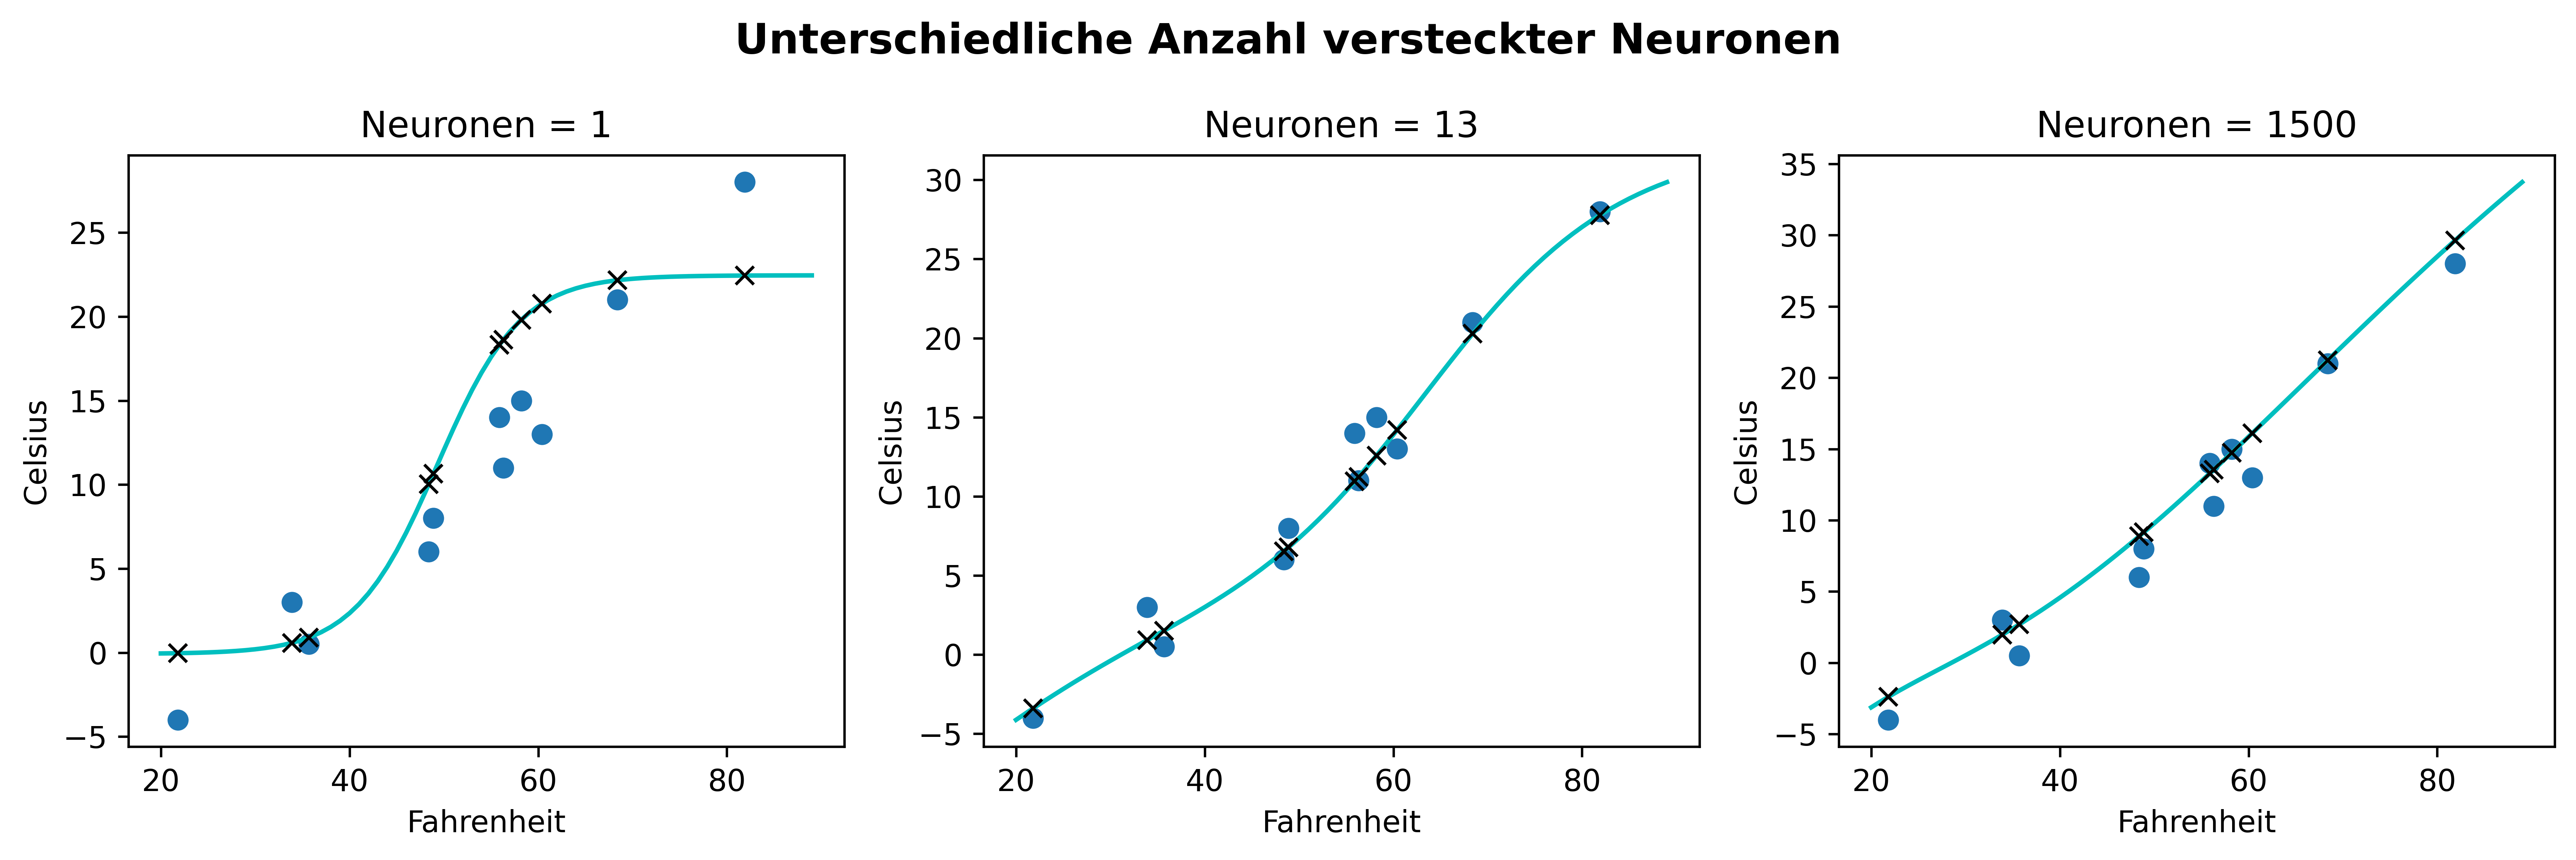

In [242]:
############ Darstellung Experiment Anzahl versteckter Neuronen ###############
t_range = torch.arange(20., 90.).unsqueeze(1)

# Definition der Subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=600)
# Array der trainierten Modelle. 
seq_models = [seq_model1, seq_model13, seq_model1500]
# Array mit den verwendeten hidden_layers
hidden_layers = [1, 13, 1500]

# For-Schleife zur Erstellung der Subplots
for i, hidden_layer in enumerate(hidden_layers):
    ax = axes[i]
    ax.set_xlabel("Fahrenheit")
    ax.set_ylabel("Celsius")
    ax.plot(t_u.numpy(), t_c.numpy(), 'o')
    ax.plot(t_range.numpy(), seq_models[i](0.1 * t_range).detach().numpy(), 'c-')
    ax.plot(t_u.numpy(), seq_models[i](0.1 * t_u).detach().numpy(), 'kx')
    ax.set_title(f"Neuronen = {hidden_layer}")

fig.suptitle("Unterschiedliche Anzahl versteckter Neuronen", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### **Frage: Welche Änderungen erzeugen ein lineares Ausgangsverhalten und welche Änderungen führen zu starkem “Overfitting”?**
Antwort: Im ersten Subplot ist erkenntlich, dass eine Reduzierung der Anzahl der Neuronen zu einem linearen Ausgangsverhalten führt. Dies liegt daran, dass das Modell durch die geringe Anzahl der Neuronen ledigliche eine lineare Beziehung zwischen den Messdaten erlernt.
Dagegen ist im dritten Subplot erkenntlich, dass eine zu hohe Anzahl von Neuronen zu einem Overfitting führt. Dies bedeutet, dass das Modell zu sehr auf die gegebenen Daten trainiert und nicht anpassungsfähig auf neue Daten ist. Beide Effekte sind für die Genauigkeit des Modells unvorteilhaft.
Im Trainingsprozess des künstlichen neuronalen Netz sollte die Anzahl der versteckten Neuronen daher gewissenhaft ausgewählt werden.   

In [243]:
## Experimentieren mit der Lernrate:

########## Lernrate = 1e-3 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer1 = optim.SGD(seq_model1.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer1,
    model = seq_model1,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Lernrate = 1e-5 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer2 = optim.SGD(seq_model2.parameters(), lr=1e-5) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer2,
    model = seq_model2,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Lernrate = 1e-2 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model3 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))
# Definition des Optimizers
optimizer3 = optim.SGD(seq_model3.parameters(), lr=1e-2) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer3,
    model = seq_model3,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 228.5161, Validation loss 158.9250
Epoch 1000, Training loss 3.6554, Validation loss 1.2956
Epoch 2000, Training loss 3.1894, Validation loss 6.8750
Epoch 3000, Training loss 2.1230, Validation loss 5.7819
Epoch 4000, Training loss 1.9314, Validation loss 6.3493
Epoch 5000, Training loss 1.6317, Validation loss 5.6752
Epoch 1, Training loss 195.7802, Validation loss 125.3045
Epoch 1000, Training loss 152.0637, Validation loss 80.0650
Epoch 2000, Training loss 124.8872, Validation loss 52.1856
Epoch 3000, Training loss 107.8567, Validation loss 34.9679
Epoch 4000, Training loss 97.0606, Validation loss 24.4851
Epoch 5000, Training loss 89.9677, Validation loss 18.2324
Epoch 1, Training loss 184.4849, Validation loss 114.0739
Epoch 1000, Training loss 34.9854, Validation loss 52.6287
Epoch 2000, Training loss 1.4445, Validation loss 2.0206
Epoch 3000, Training loss 1.3039, Validation loss 2.4485
Epoch 4000, Training loss 1.2497, Validation loss 2.6733
Epoch 5000, T

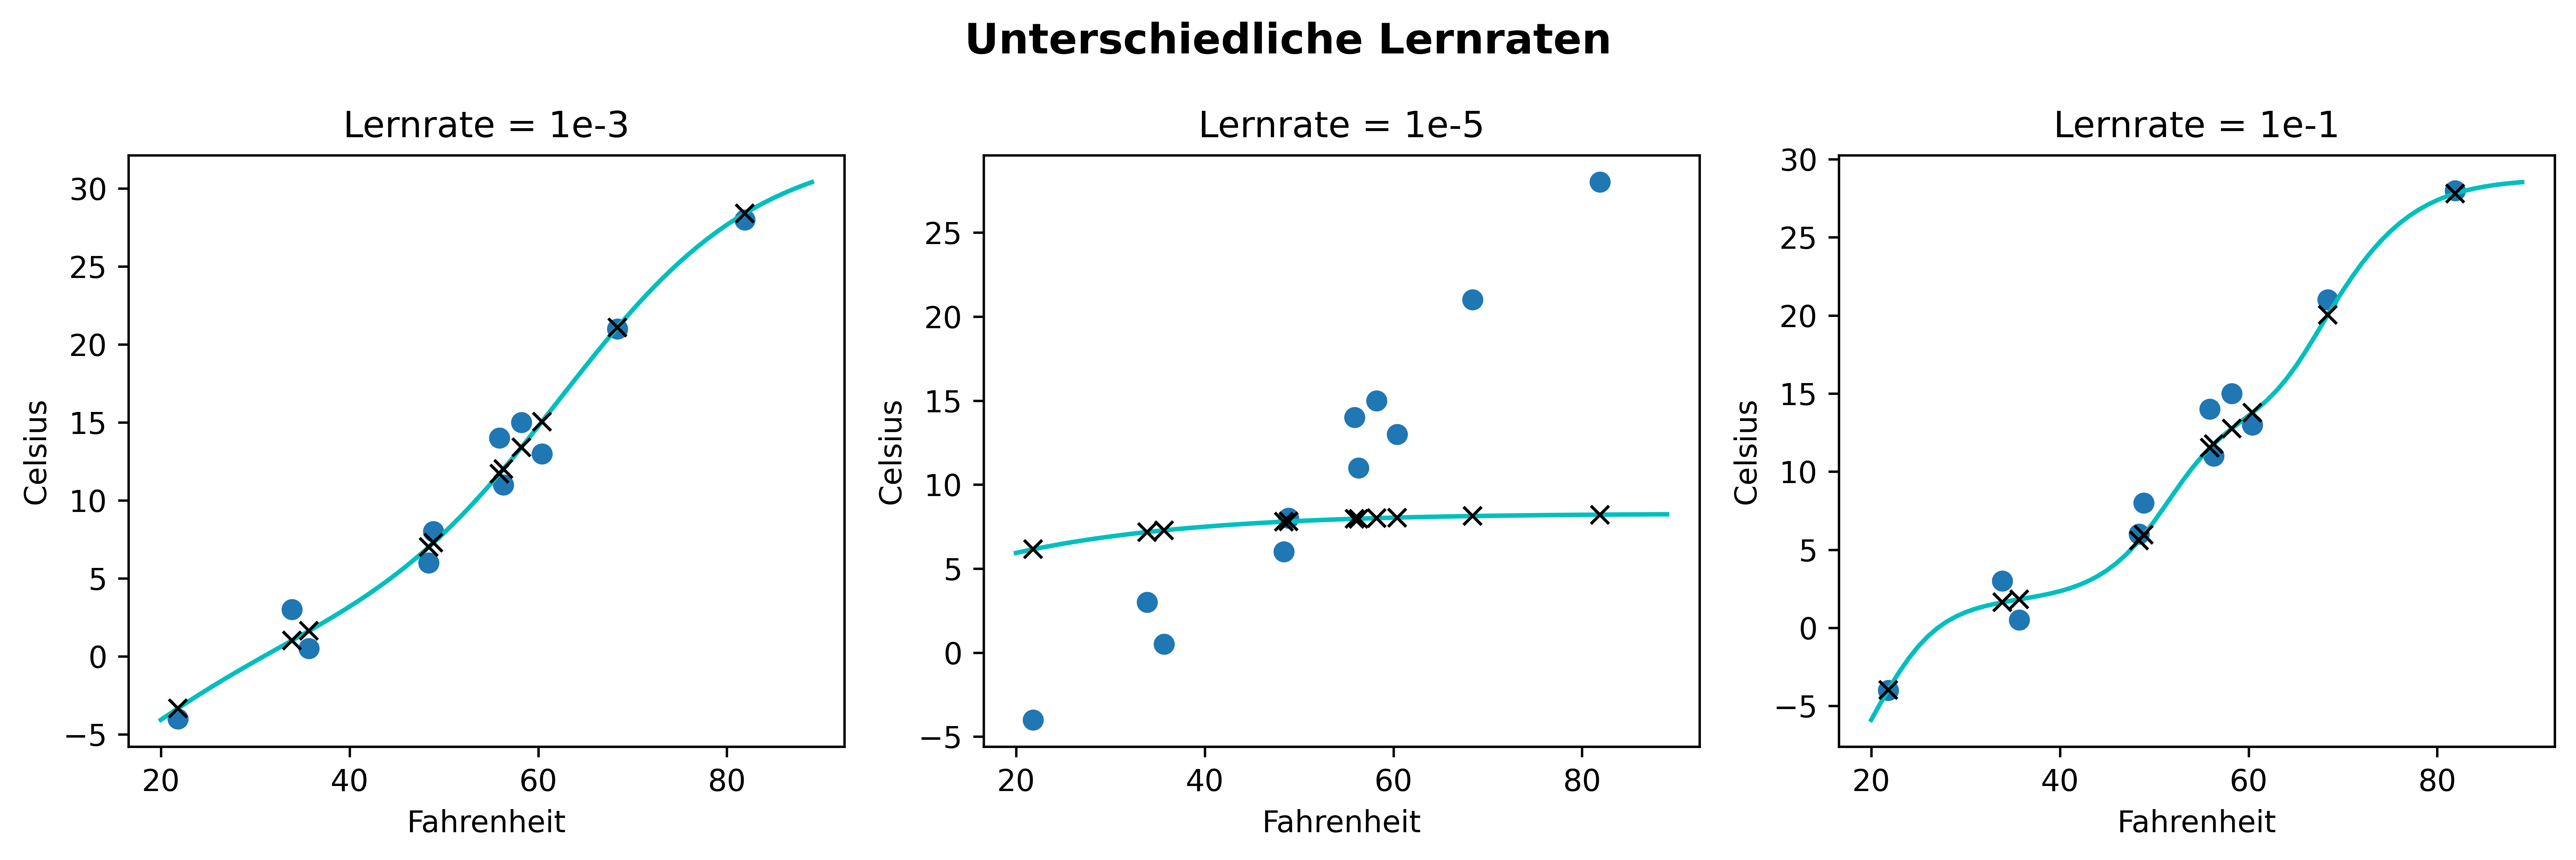

In [244]:
############### Darstellung Experiment unterschiedliche Learning-Rates ###########
t_range = torch.arange(20., 90.).unsqueeze(1)

# Definition der Subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=600)

# Daten für die For-Schleife 
learning_rate = [1e-3, 1e-5, 1e-2] # Die untersuchten Lernraten    
titels = learning_rate  # Beschreibungen für den Titel der Subplots
seq_models = [seq_model1, seq_model2, seq_model3] # Array mit den trainierten Modellen

# For-Schleife zur Erstellung der Subplots
for i, lr in enumerate(learning_rate):
    ax = axes[i]
    ax.set_xlabel("Fahrenheit")
    ax.set_ylabel("Celsius")
    ax.plot(t_u.numpy(), t_c.numpy(), 'o')
    ax.plot(t_range.numpy(), seq_models[i](0.1 * t_range).detach().numpy(), 'c-')
    ax.plot(t_u.numpy(), seq_models[i](0.1 * t_u).detach().numpy(), 'kx')
    ax.set_title("{}".format(titles[i]))

fig.suptitle("Unterschiedliche Lernraten", fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### **Frage: Welche Änderungen erzeugen ein lineares Ausgangsverhalten und welche Änderungen führen zu starkem “Overfitting”?**
Antwort: Im letzten, dritten Subplot ist erkenntlich, dass eine zu hohe Lernrate zu einem Overfitting des Modells führt. Hier entwickelt das Modell eine Linie, die beinahe alle Datenpunkte berührt. Ähnlich zu einer hohen Anzahl von Neuronen, wird hierbei das Modell zu stark an die Trainingsdaten angepasst. Dies hat zur Folge, dass das Modell weniger anpassungsfähig hinsichtlich neuer Daten, beispielsweise der Validierungsdaten, ist. 
Der zweite Subplot zeigt dagegen auf, dass eine zu niedrige Lernrate dazu führt, dass das Modell unterangepasst ist. Dies liegt daran, dass das Modell durch die zu kleine Lernrate zu langsam lernt und die Gewichte nicht genau berechnen kann. Daher kann das Modell die Beziehung der Daten nicht erkennt. Im zweiten Subplot spiegelt sich dieses in einer fast horizontalen Geraden, die nur einen Datenpunkt berührt, wieder. 

#### **Fazit:**
Das Experiment mit der Variation der Anzahl der versteckten Neuronen und der Anpassung der Lernrate hat gezeigt, dass eine zu hohe Anzahl von Neuronen und eine zu hohe Lernrate zu einem Overfitting des Modells führt. 
Eine zu geringe Lernrate und Anzahl von Neuronen führt jedoch zu einem ähnlich schlechten Modell, welches zu gering auf die Daten trainiert ist. 
Daher ist bei der Implementierung eines künstlichen neuronalen Netz darauf zu achten, dass die Lernrate und die Anzahl der Neuronen genau abgestimmt werden. Hierbei dürfen diese jedoch nicht zu hoch oder zu niedrig sein. 